## importing liberaries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import logging

### importing dataset

In [2]:
df = pd.read_csv("database SFRC.csv")

In [3]:
# dependent and independent variables
X = df.drop('Vu (KN)', axis = 1)
y = df['Vu (KN)']

In [4]:
# normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform (X)
X_norm

array([[-0.08232928,  0.03050947, -0.83064519, ..., -0.14488495,
         0.97627937, -0.25343822],
       [-0.08232928,  0.03050947, -0.9419731 , ..., -0.14488495,
         0.97627937, -0.25343822],
       [-0.08232928,  0.03050947, -0.83859718, ...,  0.30745235,
         0.97627937,  0.20182885],
       ...,
       [ 0.01120566, -0.43239725, -0.67955731, ..., -1.29312579,
        -0.51769709, -1.25502576],
       [ 0.01120566, -0.43239725, -0.67955731, ..., -1.08435473,
        -0.51769709, -0.89081211],
       [ 0.01120566, -0.43239725, -0.67955731, ..., -0.87558367,
        -0.51769709, -0.52659846]])

### train_Test Split

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)
print( X_train.shape)
print( X_test.shape)
print( y_train.shape)
print( y_test.shape)

(390, 8)
(98, 8)
(390,)
(98,)


## Decission tree model

In [87]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
DTR = DecisionTreeRegressor(criterion='friedman_mse',min_samples_leaf=1,min_samples_split=7)

In [88]:
DTR.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', min_samples_split=7)

In [89]:
DTR.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [90]:
y_pred_train = DTR.predict(X_train)
y_pred_test = DTR.predict(X_test)

### Evaluating Model

In [91]:
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [92]:
# evaluating model performance
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,DTR.predict(X_test))))
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,DTR.predict(X_train))))
print('The MSE  on the testing dataset is: ',(mean_squared_error(y_test,DTR.predict(X_test))))
print('The MSE  on the training dataset is: ',(mean_squared_error(y_train,DTR.predict(X_train))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,DTR.predict(X_test)))
print('The MAE  on the training daset is: ',mean_absolute_error(y_train,DTR.predict(X_train)))
print('The r2_score on the testing dataset is: ',r2_score(y_test,DTR.predict(X_test)))
print('The r2_score on the training dataset is: ',r2_score(y_train,DTR.predict(X_train)))

The RMSE  on the testing dataset is:  42.919754338944834
The RMSE  on the training dataset is:  30.68176663361933
The MSE  on the testing dataset is:  1842.1053125153742
The MSE  on the training dataset is:  941.3708037598765
The MAE  on the testing dataset is:  26.818136765166663
The MAE  on the training daset is:  12.068088692336753
The r2_score on the testing dataset is:  0.9249499535030616
The r2_score on the training dataset is:  0.9570145971946036


In [73]:
from sklearn import tree
plt.figure(figsize =(15,10))
fontsize=25
tree.plot_tree(DTR,filled = True)

[Text(0.6125844594594595, 0.9705882352941176, 'x[0] <= 291.288\nfriedman_mse = 22545.924\nsamples = 366\nvalue = 150.07'),
 Text(0.3508445945945946, 0.9117647058823529, 'x[1] <= 105.5\nfriedman_mse = 5341.122\nsamples = 269\nvalue = 92.971'),
 Text(0.48171452702702705, 0.9411764705882353, 'True  '),
 Text(0.20540540540540542, 0.8529411764705882, 'x[4] <= 0.542\nfriedman_mse = 577.724\nsamples = 115\nvalue = 43.011'),
 Text(0.1945945945945946, 0.7941176470588235, 'friedman_mse = 690.688\nsamples = 5\nvalue = 111.774'),
 Text(0.21621621621621623, 0.7941176470588235, 'x[3] <= 0.033\nfriedman_mse = 347.894\nsamples = 110\nvalue = 39.885'),
 Text(0.14054054054054055, 0.7352941176470589, 'x[4] <= 2.235\nfriedman_mse = 182.012\nsamples = 86\nvalue = 34.351'),
 Text(0.07027027027027027, 0.6764705882352942, 'x[3] <= 0.026\nfriedman_mse = 159.51\nsamples = 32\nvalue = 43.565'),
 Text(0.05945945945945946, 0.6176470588235294, 'x[5] <= 0.313\nfriedman_mse = 97.814\nsamples = 29\nvalue = 41.002'),
 

### hyperparameter tunning  (optimization)

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
param = { 'criterion':['squared_error','friedman_mse', 'absolute_error','poisson'],
          'splitter':['best','random'],
          'min_samples_split': range(2,20),
          'min_samples_leaf': range(1,20)
                    }

In [95]:
gcv=GridSearchCV(estimator=DTR ,param_grid=param ,n_jobs=-1,cv=10)

In [96]:
gcv.fit(X_train ,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                             min_samples_split=7),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'min_samples_leaf': range(1, 20),
                         'min_samples_split': range(2, 20),
                         'splitter': ['best', 'random']})

In [97]:
gcv.best_params_

{'criterion': 'squared_error',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'splitter': 'random'}

In [98]:
DTR_O = DecisionTreeRegressor(criterion = 'friedman_mse', min_samples_leaf = 1, min_samples_split = 3)

In [99]:
DTR_O.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', min_samples_split=3)

In [100]:
y_pred_train = DTR_O.predict(X_train)
y_pred_test = DTR_O.predict(X_test)

### Evaluating The optimized model

In [101]:
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [102]:
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,DTR_O.predict(X_test))))
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,DTR_O.predict(X_train))))
print('The MSE  on the testing dataset is: ',(mean_squared_error(y_test,DTR_O.predict(X_test))))
print('The MSE  on the training dataset is: ',(mean_squared_error(y_train,DTR_O.predict(X_train))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,DTR_O.predict(X_test)))
print('The MAE  on the training daset is: ',mean_absolute_error(y_train,DTR_O.predict(X_train)))
print('The r2_score on the testing dataset is: ',r2_score(y_test,DTR_O.predict(X_test)))
print('The r2_score on the training dataset is: ',r2_score(y_train,DTR_O.predict(X_train)))

The RMSE  on the testing dataset is:  43.507224607797205
The RMSE  on the training dataset is:  12.092383198286342
The MSE  on the testing dataset is:  1892.878593073315
The MSE  on the training dataset is:  146.2257314141978
The MAE  on the testing dataset is:  25.9813680729932
The MAE  on the training daset is:  4.288869880948718
The r2_score on the testing dataset is:  0.9228813762937205
The r2_score on the training dataset is:  0.9933229584556392


### Feature importace for DT regression

In [23]:
DTR_O.feature_importances_

array([0.43327061, 0.38155022, 0.06975858, 0.0612461 , 0.03778719,
       0.01043805, 0.00380677, 0.00214249])

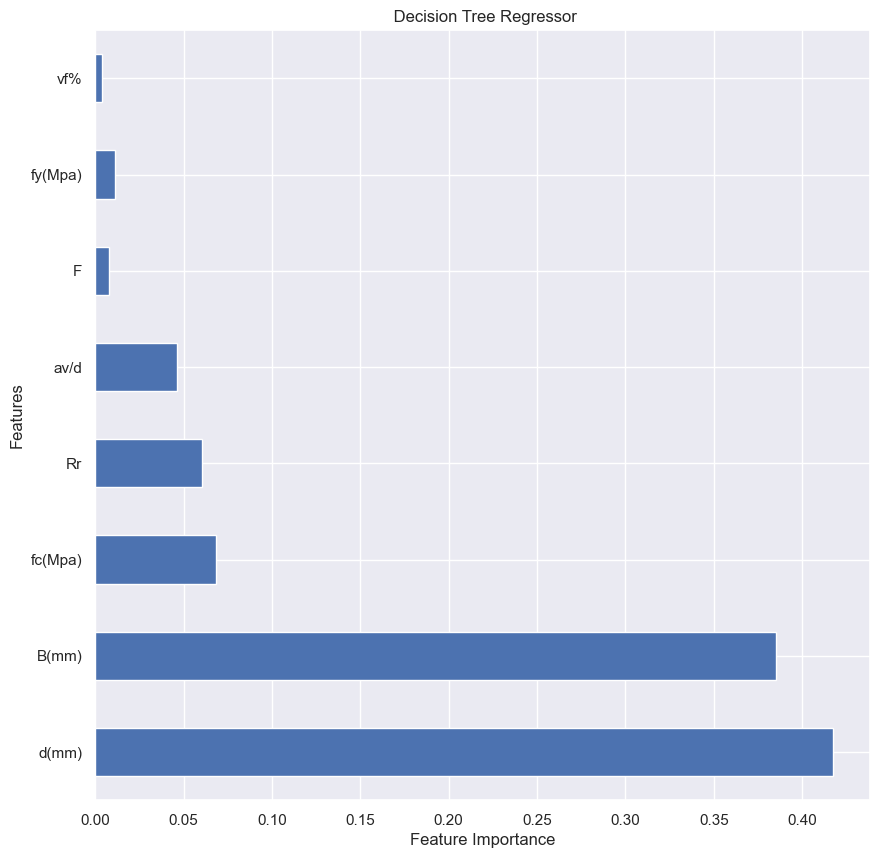

In [42]:
importances = pd.Series(DTR_O.feature_importances_ , index=X.columns)
importances.plot(kind = 'barh', figsize=(10,10))
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title(" Decision Tree Regressor")
plt.show()

### Actual Vs Predicted Capacity

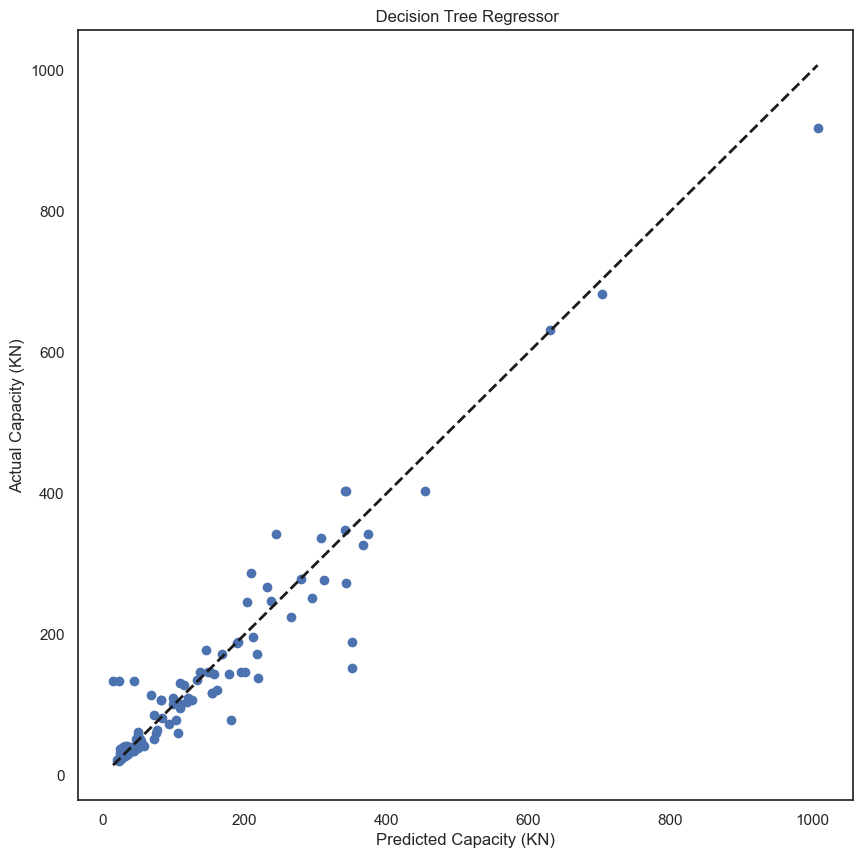

In [26]:
plt.figure(figsize=(10,10))
sns.set_style("white")
plt.xlabel("Predicted Capacity (KN)")
plt.ylabel("Actual Capacity (KN)")
plt.title(" Decision Tree Regressor")
plt.scatter(y_test,y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [44]:
X1 = np.array(X)

In [45]:
X1[0].reshape(1,-1)

array([[2.5100e+02, 1.5000e+02, 2.8100e+01, 2.6700e-02, 3.0876e+00,
        4.8750e-01, 5.6500e+02, 7.5000e-01]])

In [46]:
DTR_O.predict(X1[0].reshape(1,-1))

array([112.00875])